# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

import os

In [2]:
browser = Browser('chrome')

The chromedriver version (134.0.6998.88) detected in PATH at C:\Windows\chromedriver.exe might not be compatible with the detected chrome version (135.0.7049.115); currently, chromedriver 135.0.7049.114 is recommended for chrome 135.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html

s = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = s.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
L = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract the data from each row
    data = row.find_all('td')
    print(f'data = {data}')
    # Check if the row has the expected number of columns
    if len(data) == 7:
        # Extract the text from each column and append it to the list
        row_data = [col.text.strip() for col in data]
        # Append the row data to the list

        L.append(row_data)
        
# Print the list of rows
print(L)

data = []
data = [<td>2</td>, <td>2012-08-16</td>, <td>10</td>, <td>155</td>, <td>6</td>, <td>-75.0</td>, <td>739.0</td>]
data = [<td>13</td>, <td>2012-08-17</td>, <td>11</td>, <td>156</td>, <td>6</td>, <td>-76.0</td>, <td>740.0</td>]
data = [<td>24</td>, <td>2012-08-18</td>, <td>12</td>, <td>156</td>, <td>6</td>, <td>-76.0</td>, <td>741.0</td>]
data = [<td>35</td>, <td>2012-08-19</td>, <td>13</td>, <td>157</td>, <td>6</td>, <td>-74.0</td>, <td>732.0</td>]
data = [<td>46</td>, <td>2012-08-20</td>, <td>14</td>, <td>157</td>, <td>6</td>, <td>-74.0</td>, <td>740.0</td>]
data = [<td>57</td>, <td>2012-08-21</td>, <td>15</td>, <td>158</td>, <td>6</td>, <td>-78.0</td>, <td>740.0</td>]
data = [<td>68</td>, <td>2012-08-22</td>, <td>16</td>, <td>158</td>, <td>6</td>, <td>-77.0</td>, <td>740.0</td>]
data = [<td>79</td>, <td>2012-08-23</td>, <td>17</td>, <td>159</td>, <td>6</td>, <td>-76.0</td>, <td>742.0</td>]
data = [<td>112</td>, <td>2012-08-27</td>, <td>21</td>, <td>161</td>, <td>6</td>, <td>-

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(L, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [8]:
# Confirm DataFrame was created successfully

df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)



In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# The number of unique months in the DataFrame
num_months = df['month'].nunique()
print(f'There are {num_months} unique months on Mars.')

There are 12 unique months on Mars.


In [13]:
# 2. How many sols (Martian days) worth of data are there?
# The number of unique sols in the DataFrame
num_sols = df['sol'].nunique()
print(f'There are {num_sols} unique sols in the DataFrame.')


There are 1867 unique sols in the DataFrame.


In [14]:
# 3. What is the average minimum temperature by month?
# Group the DataFrame by month and calculate the average minimum temperature for each month

avg_min_temp_by_month = df.groupby('month')['min_temp'].mean().reset_index()



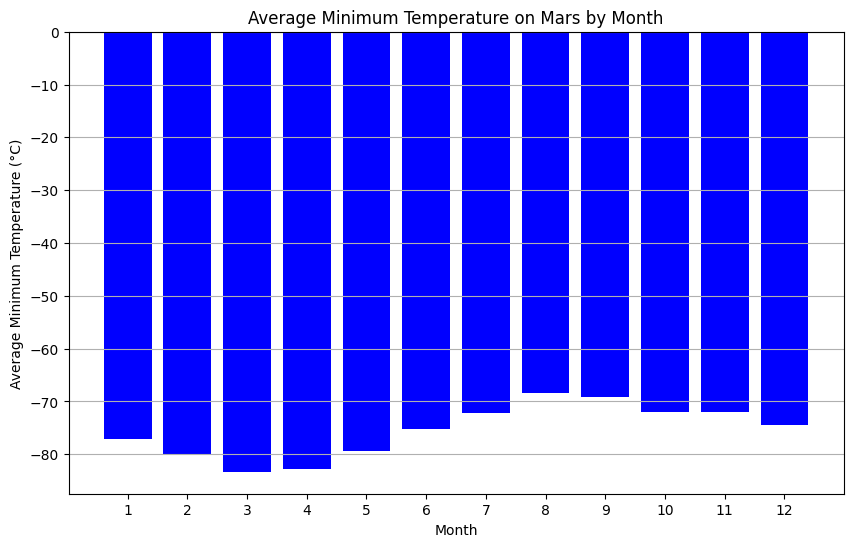

In [15]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
plt.bar(avg_min_temp_by_month['month'], avg_min_temp_by_month['min_temp'], color='blue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature on Mars by Month')
plt.xticks(avg_min_temp_by_month['month'])
plt.grid(axis='y')

if not os.path.exists('images/avg_min_temp_month.png'):
  plt.savefig('images/avg_min_temp_month.png')

plt.show()


In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sorted_avg_min_temp = avg_min_temp_by_month.sort_values(by='min_temp')

coldest_month = sorted_avg_min_temp.iloc[0]
hottest_month = sorted_avg_min_temp.iloc[-1]


print(f'The coldest month is month {coldest_month["month"]} with an average minimum temperature of {coldest_month["min_temp"]:.2f} °C.')
print(f'The hottest month is month {hottest_month["month"]} with an average minimum temperature of {hottest_month["min_temp"]:.2f} °C.')

The coldest month is month 3.0 with an average minimum temperature of -83.31 °C.
The hottest month is month 8.0 with an average minimum temperature of -68.38 °C.


In [17]:
# 4. What is the average pressure by month?

avg_pressure_by_month = df.groupby('month')['pressure'].mean().reset_index()

avg_pressure_by_month

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


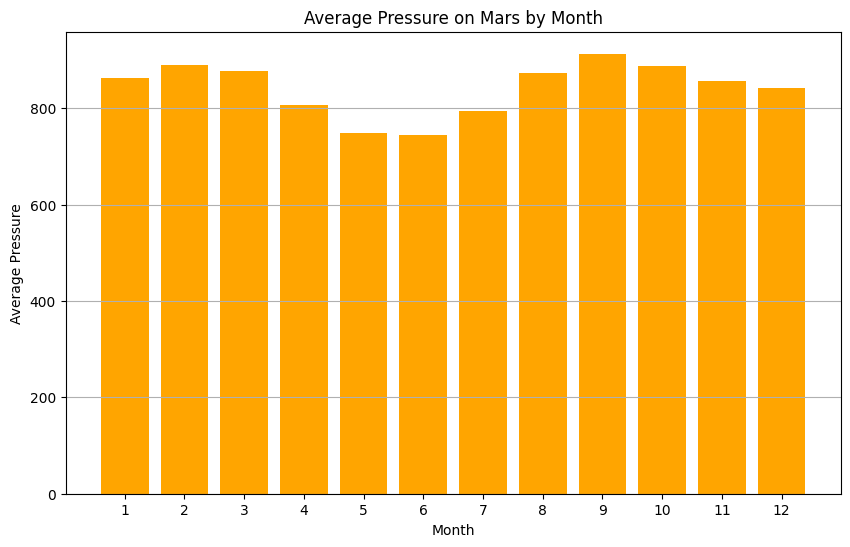

In [18]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))


plt.bar(avg_pressure_by_month['month'], avg_pressure_by_month['pressure'], color='orange')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure on Mars by Month')
plt.xticks(avg_pressure_by_month['month'])
plt.grid(axis='y')


plt.savefig('images/avg_pressure_by_month.png')
plt.show()


In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

sorted_avg_pressure = avg_pressure_by_month.sort_values(by='pressure')


lowest_pressure_month = sorted_avg_pressure.iloc[0]
highest_pressure_month = sorted_avg_pressure.iloc[-1]


print(f'The lowest pressure month is month {lowest_pressure_month["month"]} with an average pressure of {lowest_pressure_month["pressure"]:.2f} hPa.')

The lowest pressure month is month 6.0 with an average pressure of 745.05 hPa.


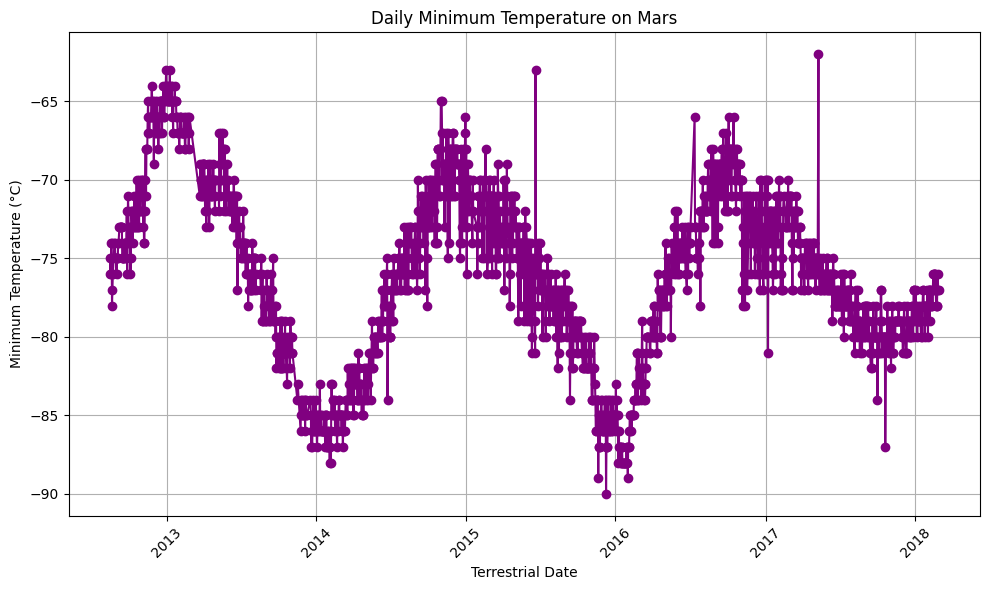

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

plt.figure(figsize=(10, 6))

plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', color='purple')

plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()


plt.savefig('images/daily_min_temp.png')
plt.show()

#### Minimum Temperature
* The minimum temperature is the lowest temperature recorded on Mars during a single Martian day (sol).


```python
# Coldest temperature on Mars
coldest_temp = mars_df['min_temp'].min()
print(f"The coldest temperature on Mars is: {coldest_temp}°C")
```

#### Atmospheric Pressure

* The atmospheric pressure is the force exerted by the weight of the atmosphere on a given area.

```python
# Atmospheric pressure on Mars
pressure = mars_df['pressure'].mean()

print(f"The average atmospheric pressure on Mars is: {pressure} Pa")
```


#### Year Length

* A Martian year is ~ 687 Earth days long.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
if not os.path.exists('mars_temperature_data.csv'):
  df.to_csv('mars_temperature_data.csv', index=False)


In [22]:
browser.quit()